In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import os

Meta data for the income distribution data.
"Enclosed is the SED data set (2015, 2025 and 2045)
provided to us by BERK for our I-405 Level II T&R Study.
The households within each TAZ are stratified into 4
income levels: Low (<$30k), Mid-Low ($30-60k),
Mid-High ($60-90k) and High (>$90k)."

"I also uploaded (in the folder "Income Distribution for Tolling)
an Excel file passed along by Eric of the household income values used by WSDOT when they were performing their last toll and revenue study.  (The estimate of how much money they will make.) 
I believe that it tells us how many households are in each of four income categories,
in each Traffic Analysis Zone (TAZ), for each of their three analysis years.
I was also able to get the files needed to map the TAZ geographic areas in a GIS.  They are in a folder inside the Income Distribution folder."

In [2]:
os.getcwd()

'/opt/dssg-hot/notebooks/shirley'

In [3]:
taz = gpd.read_file('../../data/shirleydata/shapefiles/taz2010/taz2010.shp')

In [4]:
taz.head()

,TAZ,COUNTY_FIP,COUNTY_NM,geometry
0,1,033,King,"POLYGON ((1264477.853631775 269042.4244318159,..."
1,2,033,King,"POLYGON ((1265788.093593738 268180.2485305939,..."
2,3,033,King,"POLYGON ((1265848.689620774 271492.1462768183,..."
3,4,033,King,"POLYGON ((1267095.215205749 269151.9014944629,..."
4,5,033,King,"POLYGON ((1270732.726988579 269633.6302428274,..."


In [5]:
taz.plot()

In [9]:
taz['geometry']

0       POLYGON ((1264477.853631775 269042.4244318159,...
1       POLYGON ((1265788.093593738 268180.2485305939,...
2       POLYGON ((1265848.689620774 271492.1462768183,...
3       POLYGON ((1267095.215205749 269151.9014944629,...
4       POLYGON ((1270732.726988579 269633.6302428274,...
5       POLYGON ((1271071.927100224 270062.9904049191,...
6       POLYGON ((1268733.718285415 269444.3747454867,...
7       POLYGON ((1270064.395963501 269417.9374011066,...
8       POLYGON ((1272366.317620339 268691.1777400011,...
9       POLYGON ((1273235.363113531 271323.7424485635,...
10      POLYGON ((1276362.758209289 269217.7257433803,...
11      POLYGON ((1276236.100760013 268583.5253111459,...
12      POLYGON ((1278490.136997767 268619.4799186772,...
13      POLYGON ((1277235.274792954 268519.8263443797,...
14      POLYGON ((1280357.196382784 268940.3294950754,...
15      POLYGON ((1280332.086512281 266454.4717879758,...
16      POLYGON ((1281386.765869313 268727.7846817875,...
17      POLYGO

In [ ]:
#crs = {'init': 'epsg:4326'}

In [7]:
taz.crs # 2926 = NAD83

{'init': 'epsg:2926'}

In [16]:
copy = taz.copy()
copy1 = taz.copy()

In [17]:
copy['geometry'] = copy['geometry'].to_crs(epsg=4326)
copy1['geometry'] = copy1['geometry'].to_crs(epsg=2926)

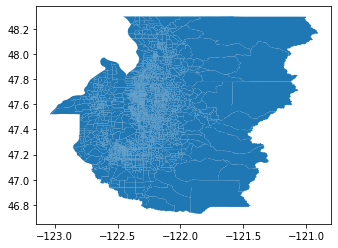

In [18]:
copy.plot()

In [13]:
copy['geometry'].head()

0    POLYGON ((-122.3609440013541 47.72733999996547...
1    POLYGON ((-122.3555520013541 47.72504799996551...
2    POLYGON ((-122.3555720013543 47.7341289999656,...
3    POLYGON ((-122.3503200013541 47.72778199996558...
4    POLYGON ((-122.3355810013542 47.72929799996579...
Name: geometry, dtype: object

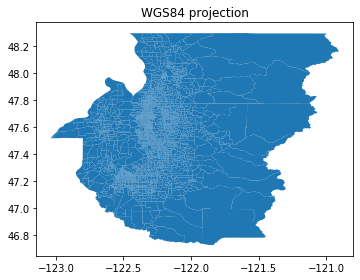

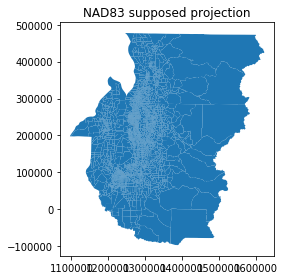

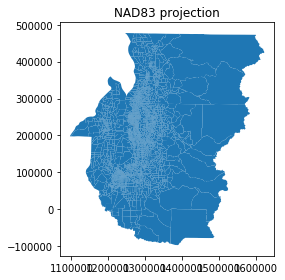

In [19]:
import matplotlib.pyplot as plt

# plot the WGS84
copy.plot()
plt.title('WGS84 projection')
plt.tight_layout()

# plot the 2926
taz.plot()
plt.title('NAD83 supposed projection')
plt.tight_layout()

# plot the 2926
copy1.plot()
plt.title('NAD83 projection')
plt.tight_layout()

In [20]:
from fiona.crs import from_epsg

In [21]:
copy.crs

{'init': 'epsg:2926'}

In [22]:
copy.crs = from_epsg(4326)

In [23]:
copy.crs

{'init': 'epsg:4326', 'no_defs': True}

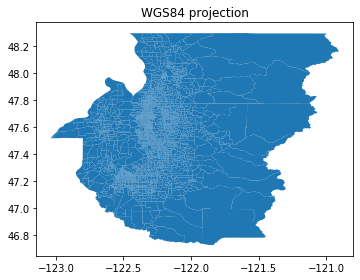

In [24]:
# plot the WGS84
copy.plot()
plt.title('WGS84 projection')
plt.tight_layout()